<a href="https://colab.research.google.com/github/patil1306sanjana/Classifier_Model/blob/main/ANN(regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('fish.csv')

In [ ]:
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
X = dataset.drop(labels=['Species','Weight' ],axis = 1)

In [ ]:
y = dataset['Weight'].astype("int32")

In [ ]:
X.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
y.head()

0    242
1    290
2    340
3    363
4    430
Name: Weight, dtype: int32

Feature Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
y_test

7       390
40        0
95      170
45      160
110     556
120     900
59      800
131     300
33      975
83      115
128     200
134     456
60     1000
126    1000
62       60
37       78
44      145
142    1600
85      130
26      720
61       55
54      390
86      120
144    1650
63       90
8       450
24      700
56      270
119     850
148       9
19      650
90      110
Name: Weight, dtype: int32

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 3.17091789e+00,  3.13904375e+00,  2.98953375e+00,
         1.65693045e-01,  1.08366267e+00],
       [ 7.32808723e-01,  7.00466821e-01,  7.34116902e-01,
        -6.72599948e-01,  2.51889882e-02],
       [ 4.92137003e-01,  5.05380667e-01,  6.89366567e-01,
         1.36936060e+00,  5.67178524e-01],
       [-3.86837976e-01, -3.72507027e-01, -4.56241991e-01,
        -3.62187165e-01, -3.72671033e-01],
       [ 1.25897428e-01,  8.59454356e-02, -4.45389154e-02,
        -2.95326914e-01,  1.76176084e-01],
       [ 6.07240869e-01,  6.51695282e-01,  8.14667504e-01,
         1.52090593e+00,  5.63990350e-01],
       [ 8.68840565e-01,  7.98009898e-01,  6.89366567e-01,
         3.96592013e-01,  1.44266306e+00],
       [-5.96117732e-01, -5.67593181e-01, -6.35243328e-01,
        -6.86649296e-01, -4.91776391e-01],
       [ 5.02600991e-01,  4.85872051e-01,  3.04513692e-01,
         2.64084241e-01,  1.00786835e+00],
       [-1.24488498e+00, -1.25039472e+00, -1.30649834e+00,
        -1.15595242e+00

Build ANN

In [ ]:
model = Sequential()
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = 'relu'))

In [ ]:
X.shape[1]

5

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 10, verbose = 1)

Epoch 1/10
13/13 [==============================] - 1s 3ms/step - loss: 167.1180 - accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: -1298.4565 - accuracy: 0.0000e+00
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: -3522.7375 - accuracy: 0.0000e+00
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: -4497.7373 - accuracy: 0.0000e+00
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: -4842.8525 - accuracy: 0.0000e+00
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: -5168.7842 - accuracy: 0.0000e+00
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: -5340.5044 - accuracy: 0.0000e+00
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: -5415.1382 - accuracy: 0.0000e+00
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: -5559.1904 - accuracy: 0.0000e+00
Epoch 10/10
13/13 [=============================

In [ ]:
y_pred = (model.predict(X_test)>0.5).astype("int32" ) 

1/1 [==============================] - 0s 98ms/step


In [ ]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
y_test

7       390
40        0
95      170
45      160
110     556
120     900
59      800
131     300
33      975
83      115
128     200
134     456
60     1000
126    1000
62       60
37       78
44      145
142    1600
85      130
26      720
61       55
54      390
86      120
144    1650
63       90
8       450
24      700
56      270
119     850
148       9
19      650
90      110
Name: Weight, dtype: int32

In [ ]:
model.evaluate(X_test, y_test.to_numpy())

1/1 [==============================] - 0s 206ms/step - loss: -7180.0088 - accuracy: 0.0000e+00


[-7180.0087890625, 0.0]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_test, y_pred)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0,

In [ ]:
accuracy_score(y_test,y_pred)

0.0

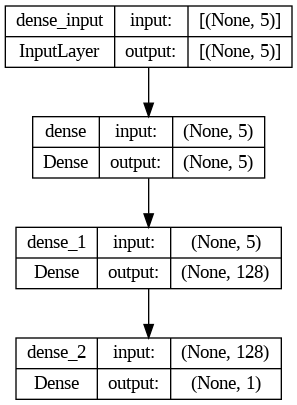

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
pip install ann_visualizer

In [ ]:
from ann_visualizer.visualize import ann_viz;
import graphviz

ann_viz(model,view = True, title="Artificial Neuron");

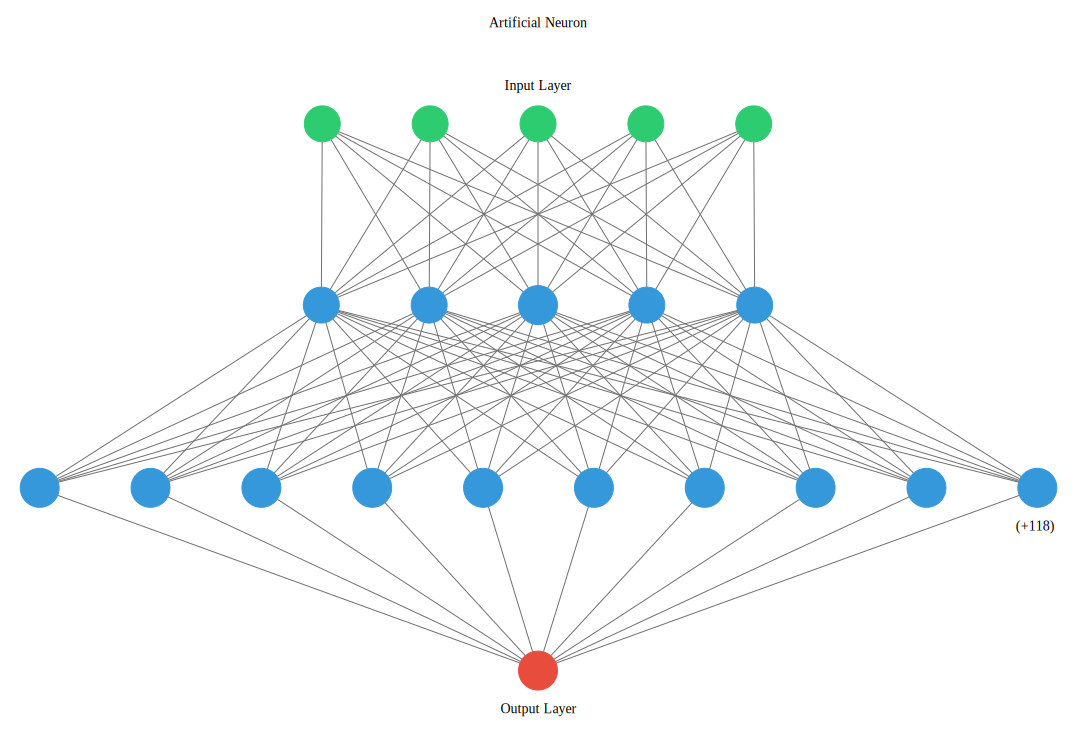

In [ ]:
graph_file = graphviz.Source.from_file('network.gv')
graph_file